# Logistic Regression Exercise 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv ("diabetes.csv")       # Diabetes diagnoize data 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x = pd.DataFrame (data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = data.Outcome

In [4]:
x_train, x_test, y_train, y_test = train_test_split ( x , y , test_size = 0.25, random_state = 0)

**In scikit-learn's logistic regression implementation, the solver parameter specifies the algorithm to use in the optimization problem. Each solver has its advantages and is suitable for different scenarios depending on the size of the dataset, sparsity of features, and computational resources available. The choice of solver can impact the convergence speed, memory usage, and performance of the logistic regression model. Experimentation may be necessary to determine the most suitable solver for a specific problem.**

<span style="color:orange">**Solver = liblinear** 
- This solver is suitable for small datasets and is the default choice for logistic regression in scikit-learn.
- It uses a coordinate descent (CD) algorithm, which is based on minimizing the logistic loss using L1 regularization.
- 'liblinear' supports both L1 and L2 regularization.

In [5]:
logreg1 = LogisticRegression (solver = 'liblinear')
logreg1.fit (x_train, y_train)

LogisticRegression(solver='liblinear')

In [6]:
y_pred1 = logreg1.predict (x_test)

In [7]:
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred1))

Accuracy: 0.8072916666666666


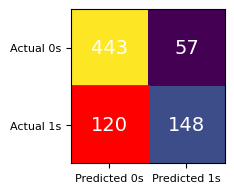

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       500
           1       0.72      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



In [8]:
cm = confusion_matrix (y , logreg1.predict (x))
fig, ax = plt.subplots (figsize = (2,2))
ax.imshow (cm)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'], fontsize=8)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'], fontsize=8)

#ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white', fontsize=14)
        
rect = plt.Rectangle((0 - 0.5, 1 - 0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='red')
ax.add_patch(rect)     

plt.show ()
print ( classification_report (y,logreg1.predict(x)))

<span style="color:orange">****solver = newton-cg**

- This solver uses Newton's method with a conjugate gradient optimization.
- It is based on Newton's method and requires computing the Hessian matrix of the loss function.
- 'newton-cg' is more suitable for smaller datasets where the Hessian matrix can be computed efficiently.

In [1]:
logreg2 = LogisticRegression (solver = 'newton-cg')
logreg2.fit (x_train, y_train)
y_pred2 = logreg1.predict (x_test)
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred2))

NameError: name 'LogisticRegression' is not defined

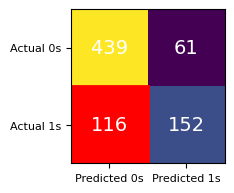

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       500
           1       0.71      0.57      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



In [10]:
cm2 = confusion_matrix (y , logreg2.predict (x))
fig, ax = plt.subplots (figsize = (2,2))
ax.imshow (cm2)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'], fontsize=8)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'], fontsize=8)

#ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm2[i, j], ha='center', va='center', color='white', fontsize=14)
rect = plt.Rectangle((0 - 0.5, 1 - 0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='red')
ax.add_patch(rect)            
plt.show ()
print ( classification_report (y,logreg2.predict(x)))

<span style="color:orange">****solver = 'lbfgs' (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)**

- This solver approximates the second-order derivative matrix (Hessian matrix) of the objective function.
- 'lbfgs' is suitable for smaller datasets and typically converges faster than 'newton-cg' for logistic regression problems.

In [11]:
logreg3 = LogisticRegression (solver = 'lbfgs')
logreg3.fit (x_train, y_train)
y_pred3 = logreg1.predict (x_test)
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred3))

Accuracy: 0.8072916666666666


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


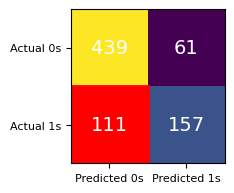

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       500
           1       0.72      0.59      0.65       268

    accuracy                           0.78       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.78      0.77       768



In [12]:
cm3 = confusion_matrix (y , logreg3.predict (x))
fig, ax = plt.subplots (figsize = (2,2))
ax.imshow (cm3)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'], fontsize=8)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'], fontsize=8)

#ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm3[i, j], ha='center', va='center', color='white', fontsize=14)
rect = plt.Rectangle((0 - 0.5, 1 - 0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='red')
ax.add_patch(rect)            
plt.show ()
print ( classification_report (y,logreg3.predict(x)))

<span style="color:orange">**Solver = sag (Stochastic Average Gradient descent)**

- This solver uses a stochastic gradient descent method for optimization.
- It is efficient for large-scale problems and is designed to handle large datasets efficiently.
- 'sag' can also handle sparse input data.

In [13]:
logreg4 = LogisticRegression (solver = 'sag')
logreg4.fit (x_train, y_train)
y_pred4 = logreg1.predict (x_test)
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred4))

Accuracy: 0.8072916666666666


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


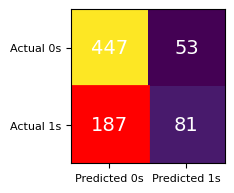

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       500
           1       0.60      0.30      0.40       268

    accuracy                           0.69       768
   macro avg       0.65      0.60      0.60       768
weighted avg       0.67      0.69      0.65       768



In [14]:
cm4 = confusion_matrix (y , logreg4.predict (x))
fig, ax = plt.subplots (figsize = (2,2))
ax.imshow (cm4)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'], fontsize=8)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'], fontsize=8)

#ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm4[i, j], ha='center', va='center', color='white', fontsize=14)
rect = plt.Rectangle((0 - 0.5, 1 - 0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='red')
ax.add_patch(rect)            
plt.show ()
print ( classification_report (y,logreg4.predict(x)))

<span style="color:orange">**Solver = saga (SAGA: Stochastic Average Gradient descent solver for L1-regularized logistic regression)**

- This solver is a variant of 'sag' that also supports L1 regularization.
- It is suitable for large-scale problems with sparse input data and is more efficient for problems with a large number of samples and features.

In [15]:
logreg5 = LogisticRegression (solver = 'saga')
logreg5.fit (x_train, y_train)
y_pred5 = logreg1.predict (x_test)
print ("Accuracy:", metrics.accuracy_score (y_test, y_pred5))

Accuracy: 0.8072916666666666


C:\Users\Sara\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


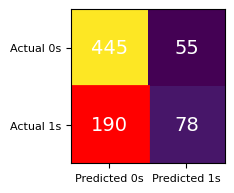

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       500
           1       0.59      0.29      0.39       268

    accuracy                           0.68       768
   macro avg       0.64      0.59      0.59       768
weighted avg       0.66      0.68      0.65       768



In [16]:
cm5 = confusion_matrix (y , logreg5.predict (x))
fig, ax = plt.subplots (figsize = (2,2))
ax.imshow (cm5)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Predicted 0s', 'Predicted 1s'], fontsize=8)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Actual 0s', 'Actual 1s'], fontsize=8)

#ax.set_ylim (1.5, -0.5)
for i in range (2):
    for j in range (2):
        ax.text(j, i, cm5[i, j], ha='center', va='center', color='white', fontsize=14)
rect = plt.Rectangle((0 - 0.5, 1 - 0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='red')
ax.add_patch(rect)            
plt.show ()
print ( classification_report (y,logreg5.predict(x)))

# Comparing the results of Solver Models 

In [17]:
solver = {
    'Report': ['Model Accuracy', 'TP', 'TN' , 'FP', 'FN', 'f1Score'],  
    'liblinear': ['0.807291', '148', '443', '57', '120', '0.77'], 
    'newton_cg': ['0.807291', '152', '439' , '61', '116', '0.77'],
    'lbfgs': ['0.807291', '157', '439' , '61', '111', '0.78'],
    'sag': ['0.807291', '81', '447' , '53', '187', '0.69'],
    'saga': ['0.807291', '78', '445' , '55', '190', '0.68'],
}

Report_Table = pd.DataFrame(solver)
Report_Table 

,Report,liblinear,newton_cg,lbfgs,sag,saga
0,Model Accuracy,0.807291,0.807291,0.807291,0.807291,0.807291
1,TP,148,152,157,81,78
2,TN,443,439,439,447,445
3,FP,57,61,61,53,55
4,FN,120,116,111,187,190
5,f1Score,0.77,0.77,0.78,0.69,0.68


<span style="color:red">The number of True Positives are decreasing from left to right, 
Which indicates that the solvers may have biased behaviour over the result. 

<span style="color:green">**Based on the "False Negative" numbers, it seems that 'lbfgs' solver is showing the best response as we are diagnosing diabates in patients, so it is better to increase cautious of the model.** 

# Selecting 'lbfgs', Let's work on more variables of the solver 

In [18]:
logreg3_1 = LogisticRegression(solver='lbfgs', C=10.0, class_weight=None, dual=False,   
                                fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                                max_iter=500, random_state=0, tol=0.0001,      #increased num of iteration to remove the error 
                                verbose=0, warm_start=False)  

logreg3_1.fit(x_train, y_train)
y_pred3_1 = logreg3_1.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred3_1))

Accuracy: 0.8020833333333334


- 1- C=10.0: The regularization parameter C controls the inverse of regularization strength. A smaller value of C indicates stronger regularization, meaning the model will generalize better but might underfit the data. Conversely, a larger value of C indicates weaker regularization, allowing the model to fit the training data more closely but risking overfitting.


- 2- class_weight=None: This parameter specifies the weights associated with classes in the target variable. When set to None, all classes are treated equally. However, if your classes are imbalanced, you can set class_weight to 'balanced' to automatically adjust the weights inversely proportional to class frequencies.


- 3- dual=False: This parameter determines whether to solve the primal or the dual optimization problem. When dual=False, the primal problem is solved, which is usually preferred when the number of samples (n_samples) is greater than the number of features (n_features).


- 4- fit_intercept=True: This parameter specifies whether to calculate the intercept for this model. If set to True, the intercept will be calculated.


- 5- intercept_scaling=1: This parameter is only used when fit_intercept=True. It scales the intercept along with the regularization term. Increasing intercept_scaling can be useful when fit_intercept=True and solver='liblinear' if the data is not centered.


- 6- l1_ratio=None: This parameter is used for elastic-net regularization when penalty='elasticnet'. It controls the ratio of L1 penalty to L2 penalty.


- 7- max_iter=100: This parameter specifies the maximum number of iterations taken for the optimization algorithm to converge.


- 8- random_state=0: This parameter sets the seed for random number generation. It ensures reproducibility of results when the model is trained multiple times.


- 9- tol=0.0001: This parameter sets the tolerance for the optimization algorithm. The optimization process stops when the change in the objective function is less than tol.


- 10- verbose=0: This parameter controls the verbosity of the output during the optimization process. Setting it to 0 means no output.


- 11- warm_start=False: This parameter allows reusing the solution of the previous call to fit as initialization. It's useful for adding more training samples to an already trained model without having to retrain from scratch.

<span style="color:green">**L1 Regularization (Lasso Regression)--- adds a penalty term to the cost function proportional to the absolute value of the coefficients.**

<span style="color:green">**L2 Regularization (Ridge Regression)--- adds a penalty term to the cost function proportional to the square of the coefficients.**</span>

# Conclusion 

<span style="color:blue">**So, we conclude that these parameters can be controlled based on our model, the loss function and cost of the prediction. For example, for disease recognition its better to train the model to be at its maximum cautious.**
</span>